In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 2. Download Clean NLTK Resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sayansarkar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sayansarkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sayansarkar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# testing the components
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Test 1: Tokenization (requires 'punkt_tab')
try:
    print("Tokenized:", word_tokenize("Hello, this is a test sentence."))
except LookupError as e:
    print("❌ Tokenization failed:", e)

# Test 2: Stopwords (requires 'stopwords')
try:
    print("Stopwords sample:", stopwords.words('english')[:10])
except LookupError as e:
    print("❌ Stopwords not found:", e)

# Test 3: Lemmatization (requires 'wordnet')
try:
    lemmatizer = WordNetLemmatizer()
    print("Lemmatized word:", lemmatizer.lemmatize("running"))  # should return 'running' or 'run'
except LookupError as e:
    print("❌ Lemmatizer failed:", e)


Tokenized: ['Hello', ',', 'this', 'is', 'a', 'test', 'sentence', '.']
Stopwords sample: ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']
Lemmatized word: running


In [6]:
# 3. Load the Dataset
df = pd.read_csv("Spam_SMS.csv")


In [7]:
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.describe

<bound method NDFrame.describe of      Class                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5569  spam  This is the 2nd time we have tried 2 contact u...
5570   ham               Will ü b going to esplanade fr home?
5571   ham  Pity, * was in mood for that. So...any other s...
5572   ham  The guy did some bitching but I acted like i'd...
5573   ham                         Rofl. Its true to its name

[5574 rows x 2 columns]>

In [9]:
df.shape

(5574, 2)

In [10]:
#checking columns name
print(df.columns)


Index(['Class', 'Message'], dtype='object')


In [11]:
# renaming column for  consistency
df.columns = ['label', 'message']


In [12]:
#checking columns name
print(df.columns)

Index(['label', 'message'], dtype='object')


In [13]:
print("First 5 rows:\n", df.head())

First 5 rows:
   label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [14]:

# 4. Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 label      0
message    0
dtype: int64


In [15]:
# 5. Text Preprocessing Function
def preprocess(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetical characters
    tokens = nltk.word_tokenize(text)  # Tokenize
    stop_words = set(stopwords.words('english'))  # Load stopwords
    lemmatizer = WordNetLemmatizer()
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

In [16]:
# 6. Apply Preprocessing
df['cleaned'] = df['message'].apply(preprocess)
print("\nSample cleaned text:\n", df['cleaned'].head())


Sample cleaned text:
 0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st ...
3                  u dun say early hor u c already say
4                  nah think go usf life around though
Name: cleaned, dtype: object


In [25]:

# 7. Feature Extraction (Bag of Words)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])


In [26]:
# 8. Encode Labels
y = df['label'].map({'ham': 0, 'spam': 1})  # ham = 0, spam = 1

In [27]:
# 9. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# 10. Train the Model (Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [29]:
# 11. Make Predictions
y_pred = model.predict(X_test)

In [30]:
# 12. Evaluate the Model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9695067264573991

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       954
           1       1.00      0.79      0.88       161

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



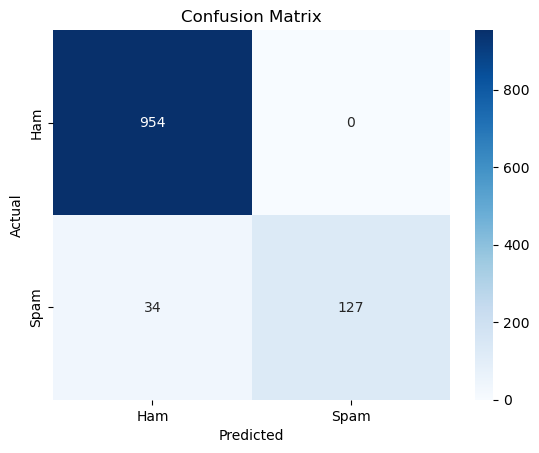

In [31]:
# 13. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()